In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nl
import MDSplus as mds
import mst_mach_tools as mmt
from ProbeDictionaries import MachProbeDict

In [97]:
M_Rj={'11':10,
      '12':10,
      '13':5,
      '14':5,
      '21':2,
      '22':10,
      '23':5,
      '24':10,
      '31':5,
      '32':5,
      '33':5,
      '34':10,
      '41':5,
      '42':20,
      '43':10,
      '44':20}

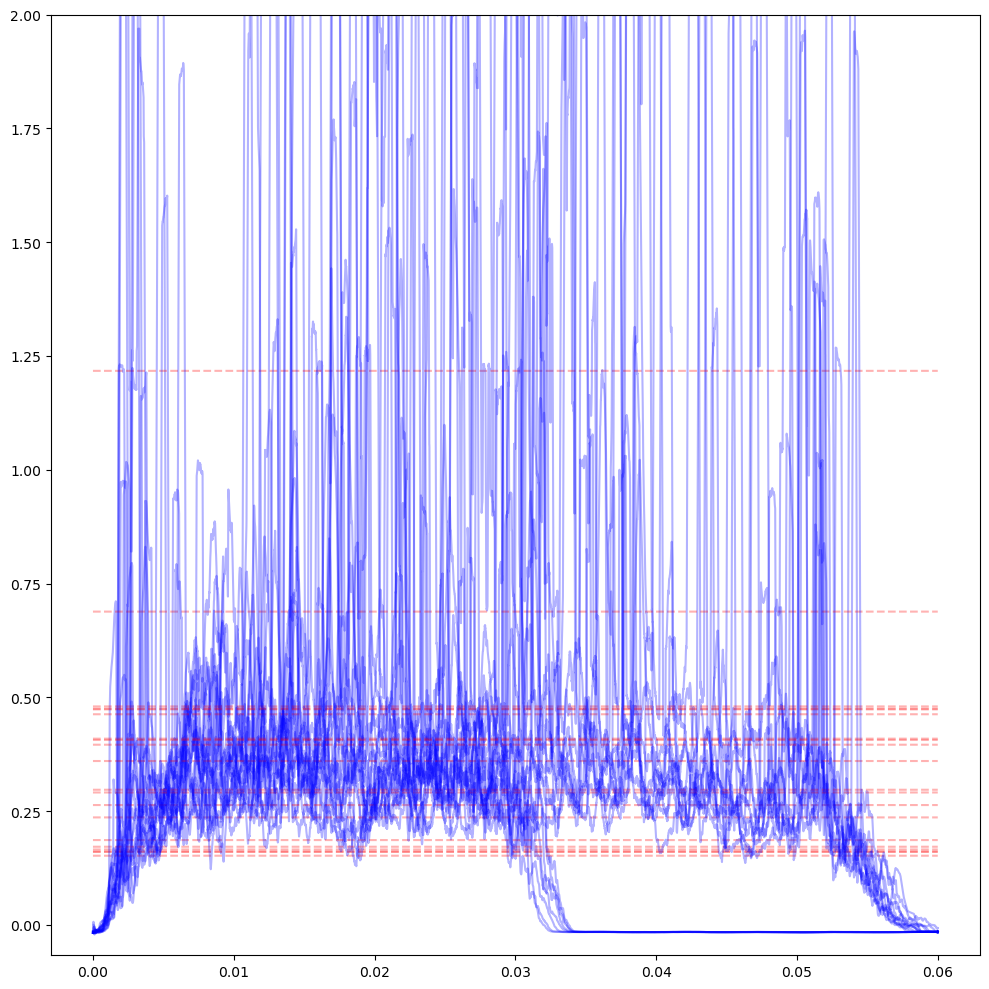

In [98]:
I_sat={}
fig1,ax1=plt.subplots(1,1,sharey=True,sharex=True,figsize=(10,10))

Plot=True
Probes=['33'] #MachProbeDict.keys()
comp='toni'
tmin=0.000
tmax=0.060
n0=1231024009
n=1231024029

for p in Probes:
    I_sat[p]=[]
    for i in range(n0,n):
        x,y = mmt.get_data(name=MachProbeDict[p]['ProbeName'],shot=i,tree='mst',comp=comp,tmin=tmin,tmax=tmax)
        ys=mmt.smooth(y,100)
        I_sat[p].append(ys.mean())
        if Plot:
            x1 = int(p[0])-1
            y1 = int(p[1])-1
            ax1.plot(x,ys,'b',alpha=0.3)
            ax1.plot(x,ys.mean()*np.ones(len(x)),'r--',alpha=0.3)
            ax1.set_ylim(top=2.0)
                
fig1.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

(array([ 7.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 11.,  6.,
         7.,  3.,  3.,  2.,  3.,  0.,  2.,  3.,  2.,  2.,  1.,  2.,  3.,
         0.,  1.,  2.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,
         0.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  3.]),
 array([-0.01611722, -0.01599234, -0.01586747, -0.0157426 , -0.01561773,
        -0.01549286, -0.01536798, -0.01524311, -0.01511824, -0.01499337,
        -0.0148685 , -0.01474362, -0.01461875, -0.01449388, -0.01436901,
        -0.01424414, -0.01411926, -0.01399439, -0.01386952, -0.01374465,
        -0.01361977, -0.0134949 , -0.01337003, -0.01324516, -0.01312029,
        -0.01299541, -0.01287054, -0.01274567, -0.0126208 , -0.012495

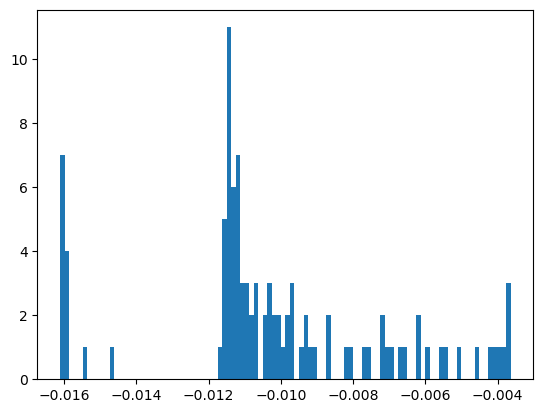

In [81]:
plt.hist(ys[:100],bins=100)

In [87]:
np.diff((ys[:100])).min()

-0.0014265163382054264

In [94]:
10/2**12

0.00244140625

In [55]:
I_sat

{'33': [0.1607409659805946,
  0.16567487433603476,
  0.1608348214323037,
  0.15198965604683956,
  0.1863502699904814,
  0.23613652189293025,
  0.2633026561187016,
  0.17171425198994286,
  0.47342605449264846,
  1.2171609216497952,
  0.6882273333884719,
  0.4799696875666491,
  0.46276303946395325,
  0.36002193943550487,
  0.2968815708313017,
  0.29089911097201626,
  0.40913263170623787,
  0.3958600846732628,
  0.47507863872338446,
  0.40624919976166773]}

In [20]:
import pandas as pd
shot_file = "shot_plan_10-24.xlsx"
compressed_shot_settings = pd.read_excel(shot_file, skiprows=1, header=0)
shot_settings = []
for i, shot in enumerate(compressed_shot_settings['Shots']): 
    shot=str(shot)
    if shot == 'nan':
        continue
    try:
        int(shot[0])
    except:
        continue
    if '-' not in shot:
        shot_settings.append(compressed_shot_settings.iloc[i].to_dict())
    if '-' in shot:
        shot_start, shot_end = shot.split('-')
        date = shot_start[:-3]
        start = shot_start[-3:]
        for j in range(int(start), int(shot_end) + 1):
            shot_to_save = date + str(j).zfill(3)
            settings = compressed_shot_settings.iloc[i].to_dict()
            settings['Shots'] = int(shot_to_save)
            shot_settings.append(settings)
shot_settings = pd.DataFrame(shot_settings)

In [70]:
shot_settings['Shots'][(shot_settings['x from wall (cm)']==4.0)] #[(shot_settings['B3.3']==186)]#[(shot_settings['x from wall (cm)']==4.0)]

41    1231023009
42    1231023010
43    1231023011
44    1231023012
45    1231023013
46    1231023014
47    1231023015
48    1231023016
49    1231023017
50    1231023018
51    1231023019
52    1231023020
53    1231023021
54    1231023022
55    1231023023
56    1231023024
57    1231023025
58    1231023026
59    1231023027
60    1231023028
61    1231023029
62    1231023030
63    1231024001
64    1231024002
65    1231024003
66    1231024004
67    1231024005
68    1231024006
69    1231024007
70    1231024008
71    1231024009
72    1231024010
73    1231024011
74    1231024012
75    1231024013
76    1231024014
77    1231024015
78    1231024016
79    1231024017
80    1231024018
81    1231024019
82    1231024020
83    1231024021
84    1231024022
85    1231024023
86    1231024023
87    1231024024
88    1231024025
89    1231024026
90    1231024027
91    1231024028
Name: Shots, dtype: int64

In [56]:
V_bias={}
for p in Probes:
    V_bias[p]=shot_settings[MachProbeDict[p]['Bias_Voltage']][(shot_settings['Shots']>n0-1)&(shot_settings['Shots']<n-1) & (shot_settings['x from wall (cm)']==4.0)].values

In [57]:
V_bias

{'33': array([150., 150., 150., 150., 186., 186., 186., 186., 186., 186., 186.,
        186., 186., 186., 186., 186., 186., 186., 186., 186.])}

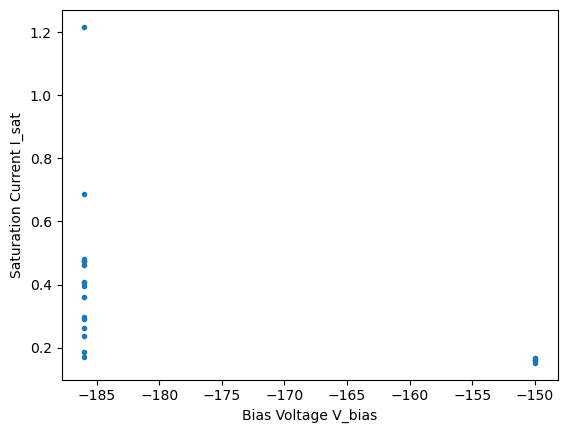

In [59]:
for p in Probes:
    plt.plot(-V_bias[p],I_sat[p],'.')
    plt.xlabel('Bias Voltage V_bias')
    plt.ylabel('Saturation Current I_sat')